In [1]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)
import os
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
df = pd.read_csv("../input/health-insurance-cross-sell-prediction/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.drop('id', axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [9]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# EDA

In [10]:
response_0 = df[df['Response'] == 0]

In [11]:
response_1 = df[df['Response'] == 1]

## Response Analysis

Males are more likely to have car accidents than females.

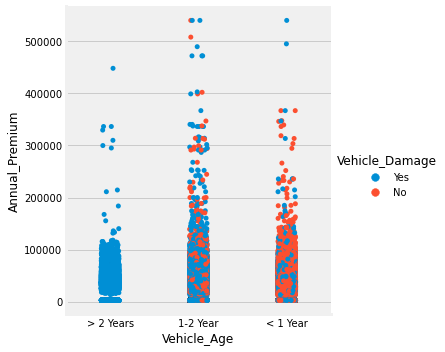

In [31]:
sns.catplot(x = 'Vehicle_Age', y = 'Annual_Premium', hue = 'Vehicle_Damage',data = df)

Vehicle Age between 0 - 2 has a higher and stable Annual Premium, people tend to be more taking care of their cars, wherears when Age > 2, customers are more focosed on lower price services where can enoughly cover the basic requirments.

## To conclude: Males at the age between 35~55 who live in region 28 & 8, have not purchased inssurance for their 1-2 year(s) old car yet that had accidents before would be MORE interested in purchasing inssurance.

# Group Segmentation & Categorical Treatment

## Gender Segmentation

In [32]:
#function to group gender into 0,1
def gender(dataframe):
    dataframe.loc[dataframe['Gender'] == 'Male', 'Gender'] = 0
    dataframe.loc[dataframe['Gender'] == 'Female', 'Gender'] = 1
    
    return dataframe

gender(df);

df['Gender'].value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

## Age Segmentation

In [33]:
#function to devide Age into 4 groups.
def age(dataframe):
    dataframe.loc[dataframe['Age'] <= 33, 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 33) & (dataframe['Age'] <= 52), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 52) & (dataframe['Age'] <= 66), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 66) & (dataframe['Age'] <= 85), 'Age'] = 4
           
    return dataframe

age(df)

df['Age'].value_counts()

1    176981
2    127089
3     51695
4     25344
Name: Age, dtype: int64

## Premium Analysis

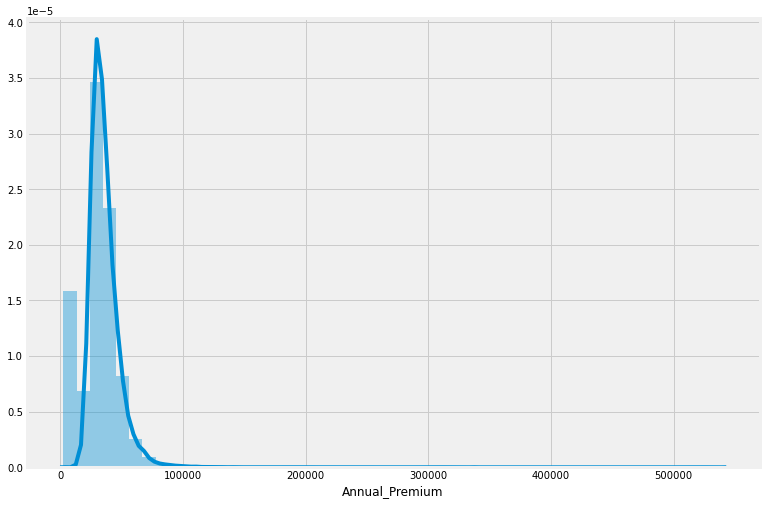

In [34]:
rcParams['figure.figsize'] = 11.7,8.27
sns.distplot(df['Annual_Premium'])

In [35]:
print('1º Quartile: ', df['Annual_Premium'].quantile(q = 0.25))
print('2º Quartile: ', df['Annual_Premium'].quantile(q = 0.50))
print('3º Quartile: ', df['Annual_Premium'].quantile(q = 0.75))
print('4º Quartile: ', df['Annual_Premium'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Annual Premium above: ', df['Annual_Premium'].quantile(q = 0.75) + 
                      1.5*(df['Annual_Premium'].quantile(q = 0.75) - df['Annual_Premium'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  24405.0
2º Quartile:  31669.0
3º Quartile:  39400.0
4º Quartile:  540165.0
Annual Premium above:  61892.5 are outliers


In [36]:
print('Numerber of outliers: ', df[df['Annual_Premium'] >= 61892.5]['Annual_Premium'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['Annual_Premium'] >= 61892.5]['Annual_Premium'].count()*100/len(df),2), '%')

Numerber of outliers:  10320
Number of clients:  381109
Outliers are: 2.71 %


In [37]:
#function to devide Annual Premium into 4 groups.
def Premium(dataframe):
    dataframe.loc[dataframe['Annual_Premium'] <= 24405.0, 'Annual_Premium'] = 1
    dataframe.loc[(dataframe['Annual_Premium'] > 24405.0) & (dataframe['Annual_Premium'] <= 39400.0), 'Annual_Premium'] = 2
    dataframe.loc[(dataframe['Annual_Premium'] > 39400.0) & (dataframe['Annual_Premium'] <= 55000), 'Annual_Premium'] = 3
    dataframe.loc[(dataframe['Annual_Premium'] > 55000) & (dataframe['Annual_Premium'] <= 540165.0), 'Annual_Premium'] = 4
           
    return dataframe

Premium(df)

df['Annual_Premium'].value_counts()

2.0    190549
1.0     95283
3.0     75883
4.0     19394
Name: Annual_Premium, dtype: int64

## Vintage Analysis

In [38]:
print('1º Quartile: ', df['Vintage'].quantile(q = 0.25))
print('2º Quartile: ', df['Vintage'].quantile(q = 0.50))
print('3º Quartile: ', df['Vintage'].quantile(q = 0.75))
print('4º Quartile: ', df['Vintage'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Vintage above: ', df['Vintage'].quantile(q = 0.75) + 
                      1.5*(df['Vintage'].quantile(q = 0.75) - df['Vintage'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  82.0
2º Quartile:  154.0
3º Quartile:  227.0
4º Quartile:  299.0
Vintage above:  444.5 are outliers


In [39]:
#function to devide Annual Premium into 4 groups.
def Vintage(dataframe):
    dataframe.loc[dataframe['Vintage'] <= 82.0, 'Vintage'] = 1
    dataframe.loc[(dataframe['Vintage'] > 82.0) & (dataframe['Vintage'] <= 154.0), 'Vintage'] = 2
    dataframe.loc[(dataframe['Vintage'] > 154.0) & (dataframe['Vintage'] <= 227.0), 'Vintage'] = 3
    dataframe.loc[(dataframe['Vintage'] > 227.0) & (dataframe['Vintage'] <= 450), 'Vintage'] = 4
           
    return dataframe

Vintage(df)

df['Vintage'].value_counts()

1    96174
3    95695
2    94786
4    94454
Name: Vintage, dtype: int64

## Label Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

df['Vehicle_Age']  = labelencoder_X.fit_transform(df['Vehicle_Age']) 
df['Vehicle_Damage']  = labelencoder_X.fit_transform(df['Vehicle_Damage']) 

In [41]:
df['Gender'] = pd.to_numeric(df['Gender'])

In [42]:
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [43]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,2,1,28.0,0,2,1,3.0,26.0,3,1
1,0,4,1,3.0,0,0,0,2.0,26.0,3,0
2,0,2,1,28.0,0,2,1,2.0,26.0,1,1
3,0,1,1,11.0,1,1,0,2.0,152.0,3,0
4,1,1,1,41.0,1,1,0,2.0,152.0,1,0


## Shrink our dataset

In [44]:
len(df)

381109

In [45]:
df_no_response = df[df['Response'] == 0]

In [46]:
df_response = df[df['Response'] == 1]

In [47]:
from sklearn.utils import resample

df_no_response_downsampled = resample(df_no_response,
                                      replace = False,
                                      n_samples=2500,
                                      random_state = 42)
len(df_no_response_downsampled)

2500

In [48]:
df_response_downsampled = resample(df_response,
                                   replace = False,
                                   n_samples=2500,
                                   random_state = 42)
len(df_response_downsampled)

2500

## Let's merge these 2 downsampled datasets into a single Dataframe

In [49]:
df_downsample = pd.concat([df_no_response_downsampled,df_response_downsampled])

In [50]:
len(df_downsample)

5000

## We are off to go, Features & Target Analysis

In [51]:
x = df_downsample.drop('Response', axis = 1)

In [52]:
y = df_downsample['Response']

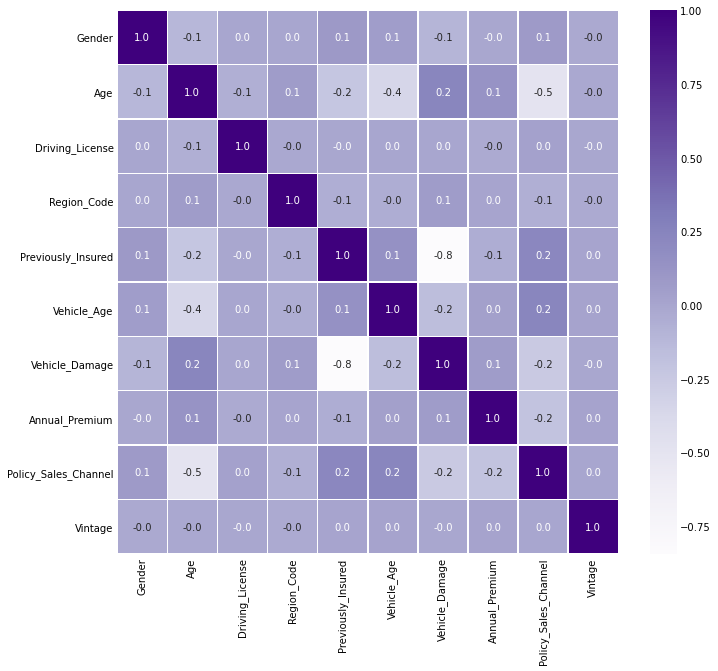

In [53]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='Purples')

# Modeling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
accuracies = {}

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

## Random Forest

In [57]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_1 = RandomForestClassifier(random_state = 42) 
rfecv = RFECV(estimator=clf_rf_1, step=1, cv=k_fold,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x.columns[rfecv.support_])

Optimal number of features : 4
Best features : Index(['Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')


In [58]:
x_1 = df_downsample[['Region_Code','Previously_Insured','Vehicle_Damage','Policy_Sales_Channel']]

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y, test_size=0.25, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [62]:
clf_rf_2 = RandomForestClassifier(random_state=43)      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)

Accuracy is:  0.7872 

RFC Reports
               precision    recall  f1-score   support

           0       0.86      0.69      0.76       626
           1       0.74      0.89      0.81       624

    accuracy                           0.79      1250
   macro avg       0.80      0.79      0.79      1250
weighted avg       0.80      0.79      0.78      1250



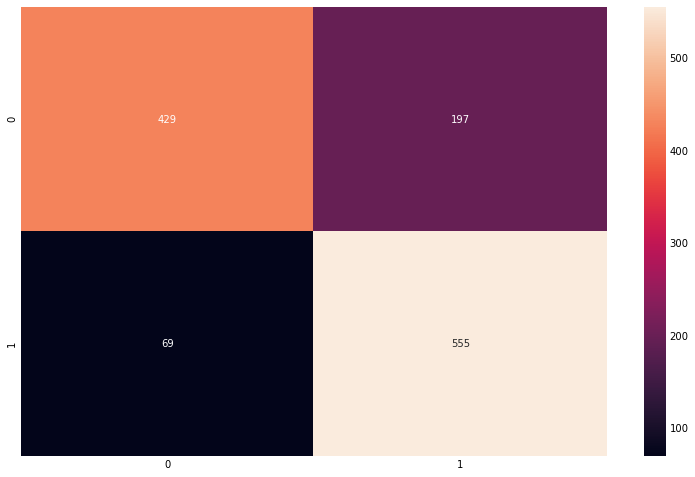

In [63]:
ac = accuracy_score(y_test,clf_rf_2.predict(x_test))
accuracies['Random_Forest'] = ac

print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,clf_rf_2.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('RFC Reports\n',classification_report(y_test, clf_rf_2.predict(x_test)))

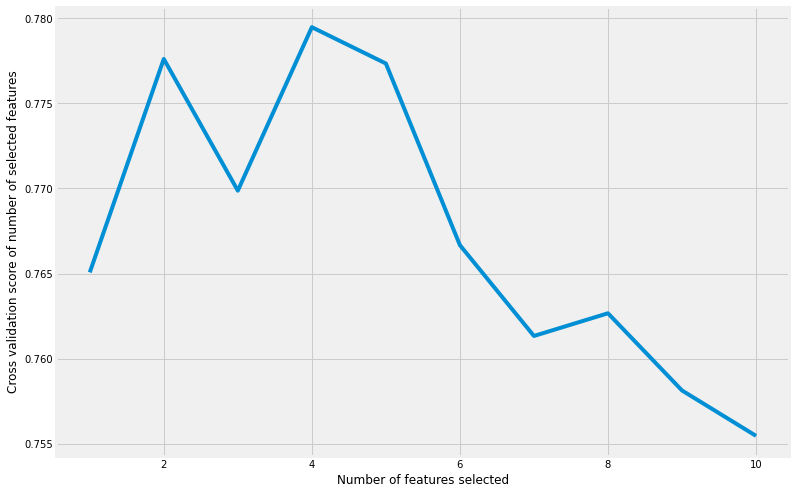

In [64]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# LogisticRegression

Accuracy is:  0.7752 

Logistic regression Reports
               precision    recall  f1-score   support

           0       0.95      0.58      0.72       626
           1       0.70      0.97      0.81       624

    accuracy                           0.78      1250
   macro avg       0.82      0.78      0.77      1250
weighted avg       0.82      0.78      0.77      1250



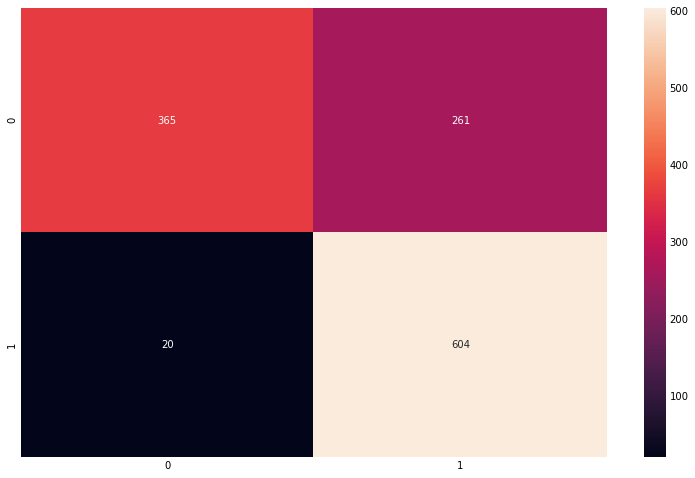

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train)

ac = accuracy_score(y_test,logmodel.predict(x_test))
accuracies['Logistic regression'] = ac

print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,logmodel.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Logistic regression Reports\n',classification_report(y_test, logmodel.predict(x_test)))

# KNN

k=1 72.80 (+/- 3.73)
k=2 67.15 (+/- 4.05)
k=3 74.11 (+/- 4.71)
k=4 70.59 (+/- 4.67)
k=5 77.04 (+/- 2.27)
k=6 72.40 (+/- 3.76)
k=7 76.77 (+/- 2.37)
k=8 74.27 (+/- 4.00)
k=9 76.80 (+/- 2.65)
k=10 74.77 (+/- 3.98)
k=11 75.89 (+/- 4.00)
k=12 75.41 (+/- 4.33)
k=13 76.96 (+/- 2.05)
k=14 76.75 (+/- 2.50)
k=15 77.79 (+/- 1.93)
k=16 75.57 (+/- 3.80)
k=17 77.55 (+/- 1.53)
k=18 77.09 (+/- 1.65)
k=19 77.41 (+/- 1.96)
k=20 77.28 (+/- 2.27)
k=21 77.31 (+/- 2.51)
k=22 77.15 (+/- 2.54)
k=23 77.33 (+/- 2.45)
k=24 77.44 (+/- 2.29)
k=25 77.95 (+/- 2.27)
The optimal number of neighbors is 24 with 77.9%


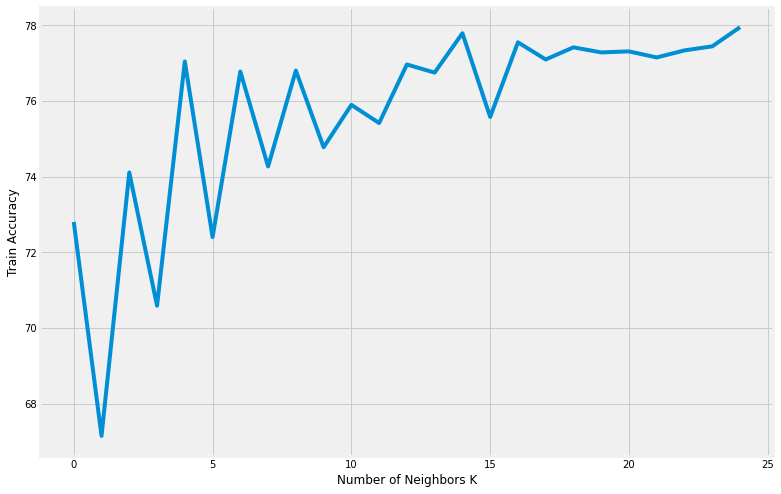

In [66]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, x_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

Accuracy is:  0.7776 

KNN Reports
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       626
           1       0.72      0.90      0.80       624

    accuracy                           0.78      1250
   macro avg       0.79      0.78      0.77      1250
weighted avg       0.79      0.78      0.77      1250



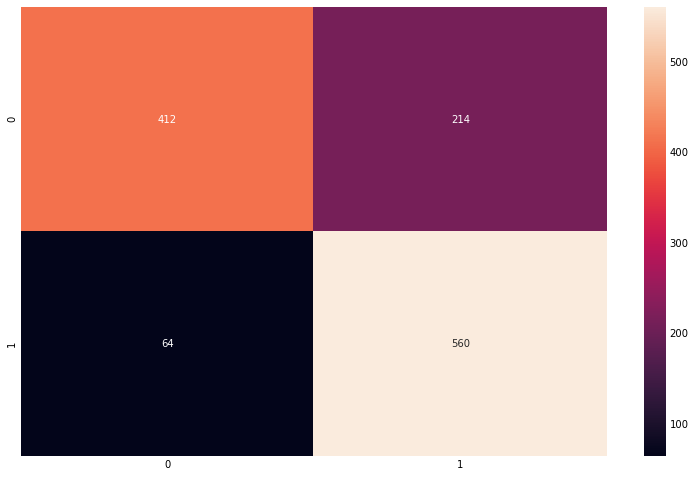

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)

ac = accuracy_score(y_test,knn.predict(x_test))
accuracies['KNN'] = ac


print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('KNN Reports\n',classification_report(y_test, knn.predict(x_test)))

# Decision Tree

Accuracy is:  0.7848 

DecisionTree Reports
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       626
           1       0.74      0.88      0.80       624

    accuracy                           0.78      1250
   macro avg       0.79      0.78      0.78      1250
weighted avg       0.79      0.78      0.78      1250



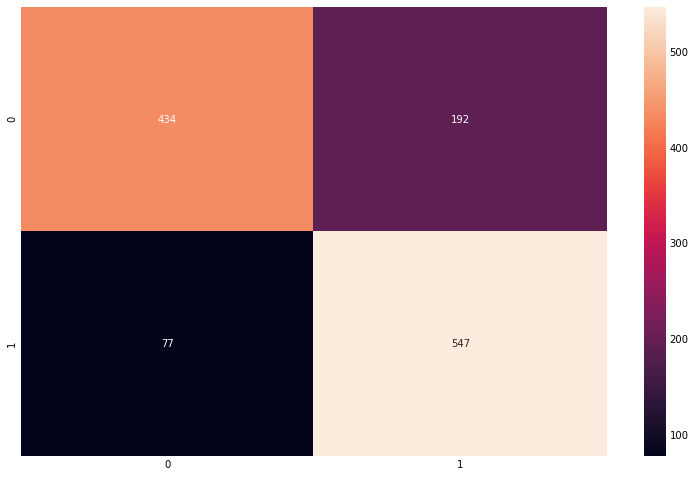

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(x_train, y_train)

ac = accuracy_score(y_test,dtree.predict(x_test))
accuracies['decisiontree'] = ac

print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,dtree.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('DecisionTree Reports\n',classification_report(y_test, dtree.predict(x_test)))

# SVM

Accuracy is:  0.7752 

SVM report
               precision    recall  f1-score   support

           0       0.95      0.58      0.72       626
           1       0.70      0.97      0.81       624

    accuracy                           0.78      1250
   macro avg       0.82      0.78      0.77      1250
weighted avg       0.82      0.78      0.77      1250



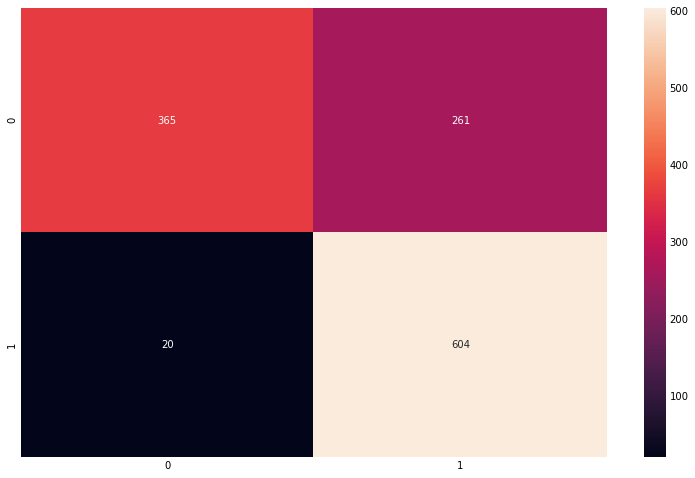

In [70]:
from sklearn.svm import SVC
svc = SVC()

svc1= SVC(random_state = 42,kernel = 'rbf')
svc1.fit(x_train, y_train)

ac = accuracy_score(y_test,svc1.predict(x_test))
accuracies['SVM'] = ac


print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,svc1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('SVM report\n',classification_report(y_test, svc1.predict(x_test)))

# Our Final Model would be 【Random Forest】 with Accuracy 79%, AUC: 0.83